# 2. Übungsblatt

**Namen**:

- Fariza Sabit
- Javier Carrasco Melo

## Aufgabe 2.3
Diese Aufgabe soll mit Stift und Papier gelöst werden.

a) mit grün markieren wir den kürzesten Weg von S nach T:
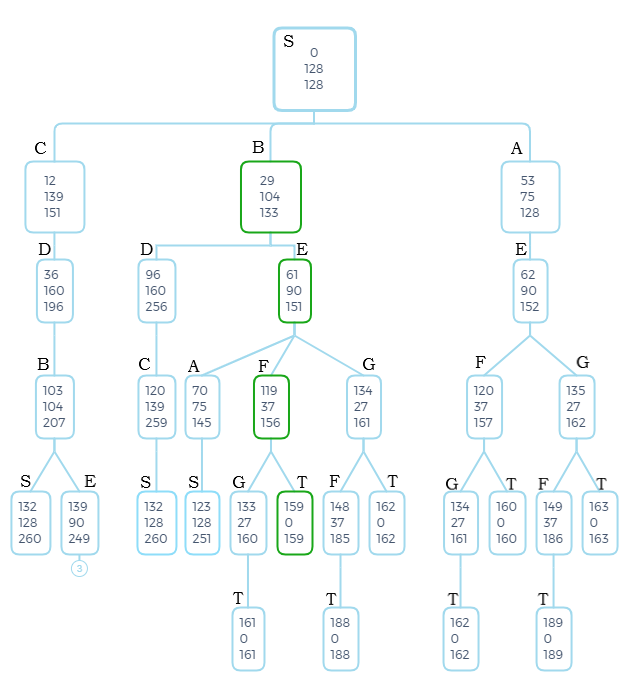

b) Warum ist die entstandene Heuristik nicht mehr monoton?

Die Heuristik h ist monoton, wenn (Definition aus dem Forum genommen):
1. h ist zulässig (es überschätzt nicht)
2. $h(u, T) \leq h(v, T) + c(u, v)$  (T ist der Zielknoten, 'u' ist der Vorgängerknoten von 'v')

Wenn wir u und v bzw. als die Knoten F un G betrachten, die Ungleichung $h(F) \leq h(G) + c(F, G)$ wird nicht gelten. Also, 
$37   \nleq   3  + 14$.



c) Wir starten mit dem Knoten E:
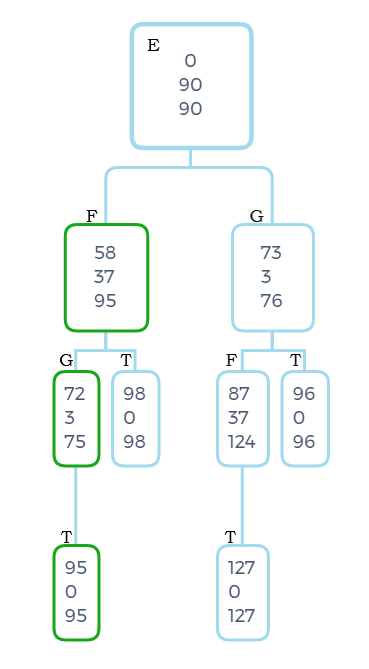

## Aufgabe 2.4
Diese Aufgabe soll mit Stift und Papier gelöst werden.

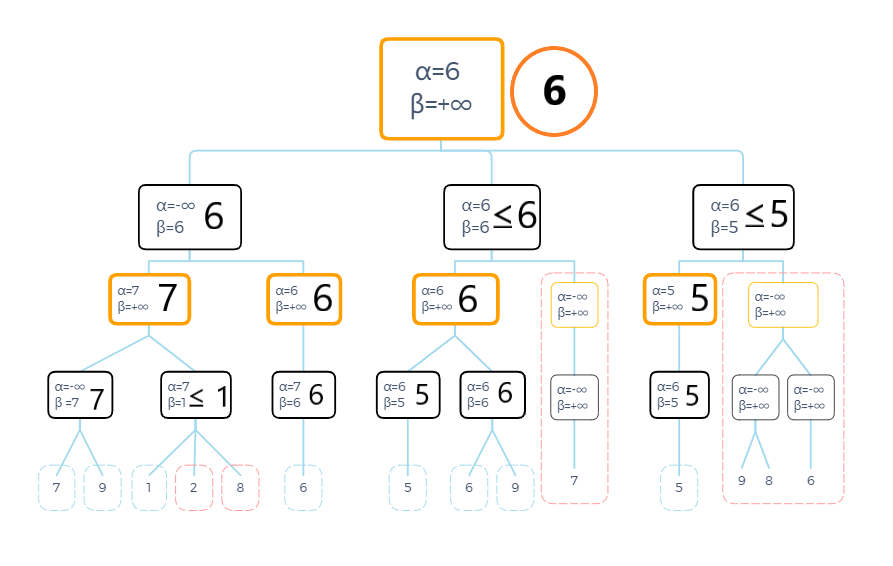

## Aufgabe 2.5

Fügen Sie Ihrer Klasse Node (siehe erstes Übungsblatt) eine Methode:

    alpha_beta_search(self, alpha, beta, is_max_player)
    
hinzu, die auf dem Node-Objekt `self` eine α−β Suche durchführt. Der Parameter `is_max_player`
gibt an ob es sich aktuell um eine MAX-Ebene oder MIN-Ebene handelt.

In [6]:
import numpy as np

In [26]:
class Node:
    def __init__(self, id, value='', alpha=np.inf*-1, beta=np.inf, visited=False, children=[]):
        self.id = id
        self.value = value
        self.alpha = alpha
        self.beta = beta
        self.visited = visited
        self.children = children
        
    def get_children(self):
        return self.children
    
    def alpha_beta_search(self, alpha, beta, is_max_player):
        self.alpha = alpha
        self.beta = beta
        self.visited = True
        
        if not(self.children):
            return self.value
        
        if(is_max_player):
            self.value = np.inf*-1
            for child in self.children:
                self.value = max(self.value, child.alpha_beta_search(self.alpha, self.beta, False))
                self.alpha = max(self.alpha, self.value)
                if self.alpha >= self.beta:
                    break
            return self.value
        else:  # is_min_player
            self.value = np.inf
            for child in self.children:
                self.value = min(self.value, child.alpha_beta_search(self.alpha, self.beta, True))
                self.beta = min(self.beta, self.value)
                if self.beta <= self.alpha:
                    break
            return self.value
    
    def __repr__(self):
        return f"Node {self.id}"

Jetzt testen wir unsere neue Methode. Zuerst repräsentieren wir einen Baum, dass wir auf [Youtube](https://www.youtube.com/watch?v=l-hh51ncgDI) gefunden haben (2:27).

In [27]:
a1 = Node(id=1, value=-1, children=[])
a2 = Node(id=2, value=3, children=[])
a3 = Node(id=3, children=[a1, a2])

b1 = Node(id=4, value=5, children=[])
b2 = Node(id=5, value=1, children=[])
b3 = Node(id=6, children=[b1, b2])

c1 = Node(id=7, value=-6, children=[])
c2 = Node(id=8, value=-4, children=[])
c3 = Node(id=9, children=[c1, c2])

d1 = Node(id=10, value=0, children=[])
d2 = Node(id=11, value=9, children=[])
d3 = Node(id=12, children=[d1, d2])

z = Node(id=13, children=[a3, b3])
y = Node(id=14, children=[c3, d3])

x = Node(id=15, children=[z, y])

Der Knoten x ist der Stamm. Wir rufen davon die Methode `alpha_beta_search()`.

In [28]:
x.alpha_beta_search(alpha=np.inf*-1, beta=np.inf, is_max_player=True)

3

Zuletzt erkunden wir den Baum um zu sehen welche Knoten besucht wurden und die Werte von den Knoten zu überprüfen.

In [34]:
def explore_tree(node):
    print(f'id={node.id}, value={node.value}, visited={node.visited}, alpha={node.alpha}, beta={node.beta}')
    if not(node.get_children()):
        return
    for child in node.get_children():
        explore_tree(child)

explore_tree(x)

id=15, value=3, visited=True, alpha=3, beta=inf
id=13, value=3, visited=True, alpha=-inf, beta=3
id=3, value=3, visited=True, alpha=3, beta=inf
id=1, value=-1, visited=True, alpha=-inf, beta=inf
id=2, value=3, visited=True, alpha=-1, beta=inf
id=6, value=5, visited=True, alpha=5, beta=3
id=4, value=5, visited=True, alpha=-inf, beta=3
id=5, value=1, visited=False, alpha=-inf, beta=inf
id=14, value=-4, visited=True, alpha=3, beta=-4
id=9, value=-4, visited=True, alpha=3, beta=inf
id=7, value=-6, visited=True, alpha=3, beta=inf
id=8, value=-4, visited=True, alpha=3, beta=inf
id=12, value=, visited=False, alpha=-inf, beta=inf
id=10, value=0, visited=False, alpha=-inf, beta=inf
id=11, value=9, visited=False, alpha=-inf, beta=inf
